# Car Sales Price Prediction

In [25]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# Load dataset

In [26]:
df= pd.read_csv("car_purchasing.csv" ,encoding='ISO-8859-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


# Data preprocessing and visualization

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


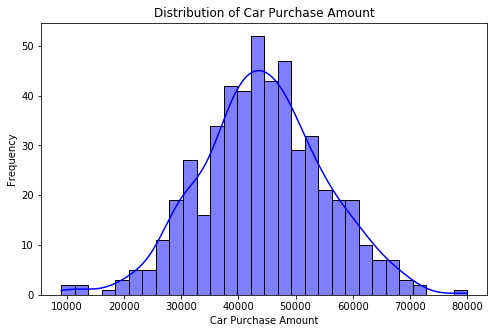

In [28]:
# Distribution of the target variable "car purchase amount" with custom colors
plt.figure(figsize=(8, 5))
sns.histplot(df["car purchase amount"], bins=30, kde=True, color='blue')
plt.title("Distribution of Car Purchase Amount")
plt.xlabel("Car Purchase Amount")
plt.ylabel("Frequency")
plt.show()

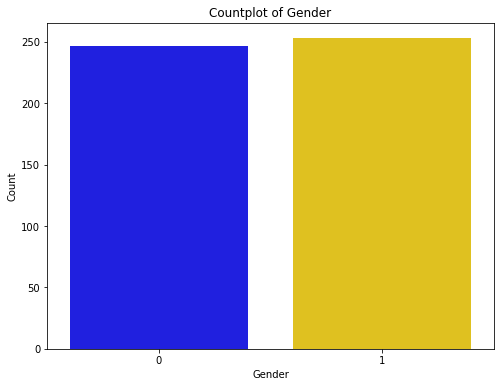

In [29]:
# Countplot for the "gender" variable with custom colors for gender 0 and 1
plt.figure(figsize=(8, 6))
custom_palette = {0: "blue", 1: "gold"}  # Define custom colors for gender 0 and 1
sns.countplot(data=df, x="gender", palette=custom_palette)
plt.title("Countplot of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [30]:
df.drop(columns=['customer name', 'customer e-mail', 'country', 'gender'], inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  500 non-null    float64
 1   annual Salary        500 non-null    float64
 2   credit card debt     500 non-null    float64
 3   net worth            500 non-null    float64
 4   car purchase amount  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [32]:
X = df.drop('car purchase amount', axis=1)
y = df['car purchase amount']

In [33]:
X.shape,y.shape

((500, 4), (500,))

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [35]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

In [36]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(400, 4)
(400,)
(100, 4)
(100,)


# Model Training

In [37]:
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=4))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                50        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                50        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/100
7/7 [==============================] - 1s 33ms/step - loss: 52572712.0000 - mean_absolute_error: 5729.2290 - val_loss: 42794796.0000 - val_mean_absolute_error: 5448.1304
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss: 52483000.0000 - mean_absolute_error: 5727.4048 - val_loss: 41790832.0000 - val_mean_absolute_error: 5412.4463
Epoch 3/100
7/7 [==============================] - 0s 11ms/step - loss: 52072256.0000 - mean_absolute_error: 5681.3906 - val_loss: 41929932.0000 - val_mean_absolute_error: 5418.2485
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 52247368.0000 - mean_absolute_error: 5687.0557 - val_loss: 41972436.0000 - val_mean_absolute_error: 5419.9297
Epoch 5/100
7/7 [==============================] - 0s 11ms/step - loss: 52713804.0000 - mean_absolute_error: 5759.9165 - val_loss: 42708660.0000 - val_mean_absolute_error: 5447.1768
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 52546184.0000 - mea

Epoch 46/100
7/7 [==============================] - 0s 10ms/step - loss: 50465160.0000 - mean_absolute_error: 5615.8794 - val_loss: 41667104.0000 - val_mean_absolute_error: 5392.9365
Epoch 47/100
7/7 [==============================] - 0s 11ms/step - loss: 51082508.0000 - mean_absolute_error: 5705.0596 - val_loss: 42478792.0000 - val_mean_absolute_error: 5422.3501
Epoch 48/100
7/7 [==============================] - 0s 11ms/step - loss: 50443576.0000 - mean_absolute_error: 5616.0815 - val_loss: 41443528.0000 - val_mean_absolute_error: 5401.3936
Epoch 49/100
7/7 [==============================] - 0s 10ms/step - loss: 50570804.0000 - mean_absolute_error: 5622.1436 - val_loss: 42023468.0000 - val_mean_absolute_error: 5400.4897
Epoch 50/100
7/7 [==============================] - 0s 10ms/step - loss: 50293132.0000 - mean_absolute_error: 5632.1411 - val_loss: 41663480.0000 - val_mean_absolute_error: 5389.0327
Epoch 51/100
7/7 [==============================] - 0s 10ms/step - loss: 50268096.000

Epoch 91/100
7/7 [==============================] - 0s 10ms/step - loss: 51385392.0000 - mean_absolute_error: 5647.6064 - val_loss: 41548280.0000 - val_mean_absolute_error: 5395.4219
Epoch 92/100
7/7 [==============================] - 0s 10ms/step - loss: 49352712.0000 - mean_absolute_error: 5585.3530 - val_loss: 43254856.0000 - val_mean_absolute_error: 5430.3203
Epoch 93/100
7/7 [==============================] - 0s 11ms/step - loss: 50016104.0000 - mean_absolute_error: 5662.1812 - val_loss: 41203592.0000 - val_mean_absolute_error: 5358.4297
Epoch 94/100
7/7 [==============================] - 0s 11ms/step - loss: 49108040.0000 - mean_absolute_error: 5573.1377 - val_loss: 41806032.0000 - val_mean_absolute_error: 5367.8701
Epoch 95/100
7/7 [==============================] - 0s 10ms/step - loss: 49349820.0000 - mean_absolute_error: 5617.8281 - val_loss: 41545452.0000 - val_mean_absolute_error: 5358.5776
Epoch 96/100
7/7 [==============================] - 0s 10ms/step - loss: 48993420.000

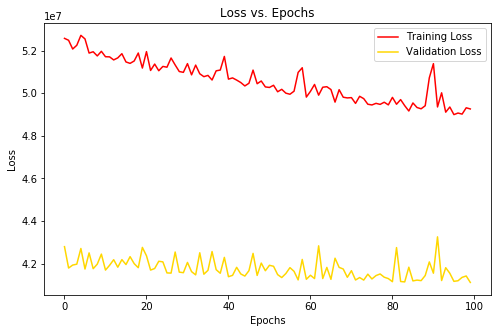

In [44]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss' , color='red')
plt.plot(history.history['val_loss'], label='Validation Loss' , color='gold')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [45]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [46]:
R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

R2 Score= 0.5929018840000764
